# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [4]:
#type your code here:
u1 = np.array([[4], [9], [6]])
u2 = np.array([[6], [8], [8]])
u3 = np.array([[0], [9], [6]])

print(u1)
print()
print(u2)
print()
print(u3)   
print(np.linalg.matrix_rank(np.block([[u1, u2, u3]])))

[[4]
 [9]
 [6]]

[[6]
 [8]
 [8]]

[[0]
 [9]
 [6]]
3


#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

### ---------------------------------------------------Write your answer here--------------------------------------------







### --------------------------------------------------------------------------------------------------------------------------------

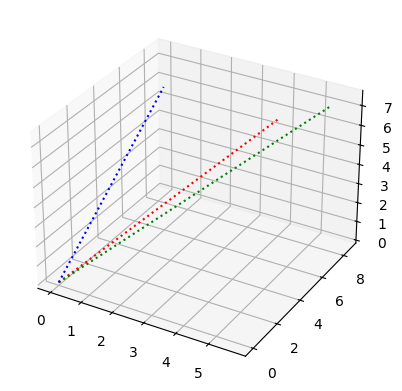

In [5]:
#type your code here
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')
ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')
ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')

#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

[[4]
 [9]
 [6]]

[[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]

[[0.]]


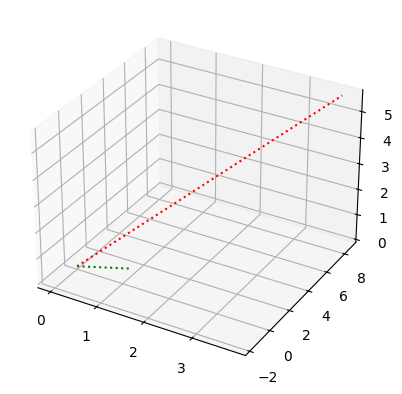

In [18]:
#type your code here
v1=u1


v2=u2-(v1.T@u2)/(v1.T@v1)*v1

print(v1)
print()
print(v2)
print()

print(v2.T@v1)

r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g:')

#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [16]:
#type your code here
v3=u3-(v1.T@u3)/(v1.T@v1)*v1-(v2.T@u3)/(v2.T@v2)*v2
print(v3)
print()
print(v3.T@v1)
print()
print(v3.T@v2)

[[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]

[[-3.55271368e-15]]

[[0.]]


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

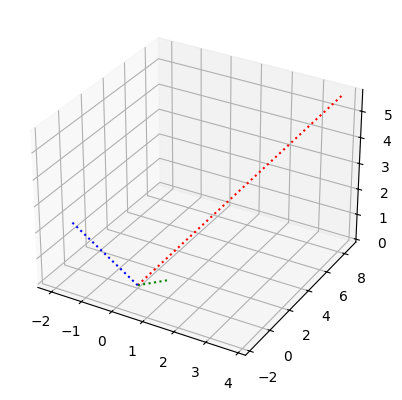

In [36]:
#type your code here
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g:')
ax.plot3D(r * v3[0], r * v3[1], r * v3[2], 'b:')


#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [24]:
#type your code here:
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)
Q=np.block([[w1, w2, w3]])
print(w1)
print()
print(w2)
print()
print(w3)
print()
print(Q)
print()
print(Q.T@Q)
print()
print(np.linalg.inv(Q))


[[0.34684399]
 [0.78039897]
 [0.52026598]]

[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]

[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]

[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]

[[ 1.00000000e+00 -6.78742704e-17 -1.21753635e-16]
 [-6.78742704e-17  1.00000000e+00 -9.67913470e-17]
 [-1.21753635e-16 -9.67913470e-17  1.00000000e+00]]

[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [25]:
#type your code here:
A=rmat(3,3)
w,v=np.linalg.eig(A)
z=w-w.real
print(A)
print()
print(w)
print()
print(v)
print()
print(z)

[[2. 1. 6.]
 [3. 5. 5.]
 [1. 0. 3.]]

[-0.16866865  6.54560771  3.62306095]

[[-0.92241623  0.32930953  0.12154962]
 [ 0.25378338  0.93964295 -0.9732254 ]
 [ 0.2911053   0.09287816  0.19508464]]

[0. 0. 0.]


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


-1.0*t**3 + 10.0*t**2 - 22.0*t - 4.0

[-0.168668653594259 + 0.e-20*I, 3.62306094511945 + 0.e-22*I, 6.54560770847481 - 0.e-22*I]



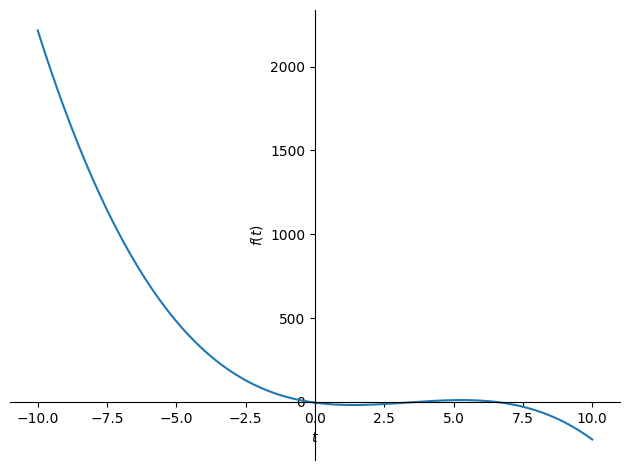

In [26]:
#typr your code here:
from sympy.abc import t
I=np.eye(3)
p=sym.det(sym.Matrix(A-t*I))
sym.solve(p)
print(p)
print()
print(sym.solve(p))
print()
p1=sym.plot(p,(t,-10,10),show=False)
p1.show()

#### (b)Use the python to generate a matrix P and a diagonal matrix D.

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`

#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A?

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [30]:
#type your code here:
w, P = np.linalg.eig(A)
D = np.diag(w)

p1 = P[:, [0]]
p2 = P[:, [1]]
p3 = P[:, [2]]

print(P)
print()
print(D)
print()



print(A @ p1 - D[0, 0] * p1)
print()
print(A @ p2 - D[1, 1] * p2)
print()
print(A @ p3 - D[2, 2] * p3)

[[-0.92241623  0.32930953  0.12154962]
 [ 0.25378338  0.93964295 -0.9732254 ]
 [ 0.2911053   0.09287816  0.19508464]]

[[-0.16866865  0.          0.        ]
 [ 0.          6.54560771  0.        ]
 [ 0.          0.          3.62306095]]

[[-1.66533454e-15]
 [-1.16573418e-15]
 [ 3.05311332e-16]]

[[ 8.88178420e-16]
 [-2.66453526e-15]
 [-6.66133815e-16]]

[[3.33066907e-16]
 [3.10862447e-15]
 [5.55111512e-16]]


#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [33]:
#type your code here:
A=P @ D @ np.linalg.inv(P)
print(A)
print()
print(P @ D @ np.linalg.inv(P))
print()
print(np.linalg.matrix_power(A, 5))
print()
print(P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P))
print()
print(np.linalg.matrix_power(A, 10))
print()
print(P @ np.linalg.matrix_power(D, 10) @ np.linalg.inv(P))

[[2.0000000e+00 1.0000000e+00 6.0000000e+00]
 [3.0000000e+00 5.0000000e+00 5.0000000e+00]
 [1.0000000e+00 6.9880567e-16 3.0000000e+00]]

[[2.0000000e+00 1.0000000e+00 6.0000000e+00]
 [3.0000000e+00 5.0000000e+00 5.0000000e+00]
 [1.0000000e+00 6.9880567e-16 3.0000000e+00]]

[[ 3404.  2136.  8924.]
 [ 9188.  6476. 23468.]
 [ 1024.   556.  2760.]]

[[ 3404.  2136.  8924.]
 [ 9188.  6476. 23468.]
 [ 1024.   556.  2760.]]

[[4.03509600e+07 2.60654240e+07 1.05135184e+08]
 [1.14808672e+08 7.46123520e+07 2.98744160e+08]
 [1.14204640e+07 7.32248000e+06 2.98039840e+07]]

[[4.03509600e+07 2.60654240e+07 1.05135184e+08]
 [1.14808672e+08 7.46123520e+07 2.98744160e+08]
 [1.14204640e+07 7.32248000e+06 2.98039840e+07]]


# Bonus: Gram-Schmidt Algorithm

#### 1. Define a function that computes the projection of one vector onto another.

In [4]:
def project(u, v):
    """
    Returns the projection of vector u onto vector v.

    Parameters:
        u (np.ndarray): the vector being projected
        v (np.ndarray): the vector we project onto

    Returns:
        np.ndarray: the projection of u onto v
    """

    # your code


#### 2. Define a function that returns a normalized (unit-length) version of a vector.

In [10]:
def normalize(v):
    """
    Returns the unit-length normalization of vector v.

    Parameters:
        v (np.ndarray): the vector to normalize

    Returns:
        np.ndarray: the normalized vector
    """

    # your code



#### 3. Implement the Gram-Schmidt algorithm for a set of linearly independent vectors.

In [ ]:
def gram_schmidt(A):
    """
    Applies the Gram-Schmidt process to the columns of matrix A
    and returns an orthonormal basis.

    Parameters:
        A (np.ndarray): matrix whose columns are linearly independent vectors

    Returns:
        np.ndarray: matrix whose columns form an orthonormal basis
    """
    m, n = A.shape
    if m < n:
        raise ValueError("Matrix must have at least as many rows as columns (m >= n).")

    if np.linalg.matrix_rank(A) != n:
        raise ValueError("Columns of the matrix must be linearly independent.")

    # your code



#### Generate a random $3 \times 3$ matrix using `rmat(3,3)`, and check it's rank

A=
 [[3. 2. 8.]
 [0. 0. 2.]
 [9. 5. 8.]]
Rank = 3


#### Apply the Gram-Schmidt algorithm

[[ 3.16227766e-01  9.48683298e-01 -8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 9.48683298e-01 -3.16227766e-01 -2.44249065e-15]]


#### Use this function to check whether a matrix is orthogonal or orthonormal.

In [ ]:
def check_orthogonality(B, tol=1e-9):
    """
    Manually checks whether the columns of B are orthogonal,
    orthonormal, or neither.
    """
    m, n = B.shape
    is_orthogonal = True
    is_orthonormal = True

    # Check pairwise orthogonality
    for i in range(n):
        for j in range(i + 1, n):
            dp = B[:, i] @ B[:, j]
            if abs(dp) > tol:
                is_orthogonal = False
                is_orthonormal = False

    # Check norms
    for i in range(n):
        norm = np.linalg.norm(B[:, i])
        if abs(norm - 1) > tol:    # not unit length
            is_orthonormal = False

    # Interpret results
    if is_orthonormal:
        return "orthonormal"
    if is_orthogonal:
        return "orthogonal"
    return "neither"


In [42]:
#type your code here:


orthonormal


#### Repeat the same process with a $4\times4$ or higher matrices

In [ ]:
#type your code here:
